In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-poster')
%matplotlib inline

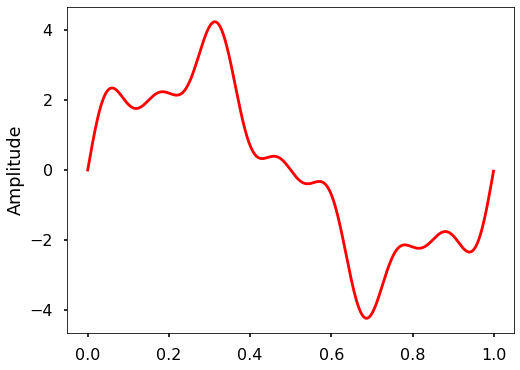

In [2]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [3]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/tmp/ipykernel_414333/2447086417.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [4]:
# Starting actual data transformation
#importing data
headers = ['time_utc','id','wind_speed_ms','wind_direction_degrees','temperature','active_power_watt']

df = pd.read_csv("../AssetsData/formatted_data_march.csv", sep=',', names=headers, parse_dates=['time_utc'], skiprows=1)
print(df.head())
print(len(df))
print(df.info())

                 time_utc  id  wind_speed_ms  wind_direction_degrees  \
0 2022-03-27 00:00:00.034  49      -1.439479           -8.660254e-01   
1 2022-03-27 00:00:30.305  49      -1.364664           -7.880107e-01   
2 2022-03-27 00:00:29.281  93      -1.065408           -2.923718e-01   
3 2022-03-27 00:00:29.282  96      -0.840965           -8.742278e-08   
4 2022-03-27 00:00:29.281  97      -0.766151           -8.715581e-02   

   temperature  active_power_watt  
0     0.030971               1700  
1     0.030971               2700  
2     1.163161              42800  
3     1.163161              40500  
4     1.163161              50200  
538271
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538271 entries, 0 to 538270
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   time_utc                538271 non-null  datetime64[ns]
 1   id                      538271 non-null  int64

77708
                  time_utc  active_power_watt
0  2022-03-27 00:00:00.034               1700
1  2022-03-27 00:00:30.305               2700
12 2022-03-27 00:02:01.153              66400
17 2022-03-27 00:02:33.112             108600
24 2022-03-27 00:03:03.391             104800


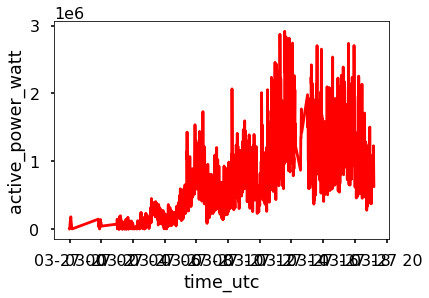

[1.41684870e+09 5.95954483e+08 2.40451402e+08 ... 8.41603780e+07
 2.40451402e+08 5.95954483e+08]


/tmp/ipykernel_414333/3340821949.py:18: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


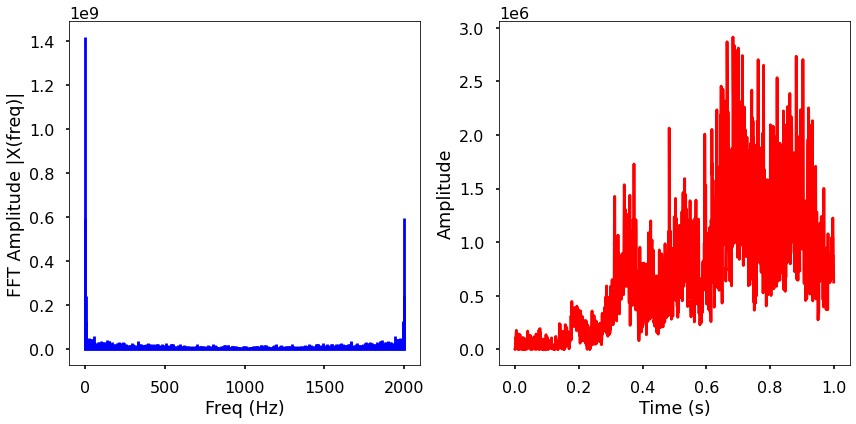

[ 1.41684870e+09+0.00000000e+00j -1.15616870e+08+5.84631923e+08j
 -1.53125473e+08+1.85390038e+08j ...  6.59499363e+07-5.22836029e+07j
 -1.53125473e+08-1.85390038e+08j -1.15616870e+08-5.84631923e+08j]


In [5]:
x = df[df['id'] == 49][:2000][['time_utc', 'active_power_watt']]
print(len(df[df['id'] == 49]))
sr = len(x)
print(x.head())
sns.lineplot(data = x, x = 'time_utc', y = 'active_power_watt', color = 'red')
plt.show()

X = fft(x['active_power_watt'])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

print(np.abs(X))
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(-1, 11)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
print(X)

#df = df[df.id == 49]
#sns.lineplot(df['active_power_watt'])

                     time_utc  active_power_watt
0     2022-03-27 00:00:00.034       16652.453973
1     2022-03-27 00:00:30.305       16928.715300
12    2022-03-27 00:02:01.153       79904.976626
17    2022-03-27 00:02:33.112      121381.237953
24    2022-03-27 00:03:03.391      116857.499280
...                       ...                ...
17044 2022-03-27 19:11:05.691     -395306.199280
17052 2022-03-27 19:11:05.691     -396029.937953
17059 2022-03-27 19:11:30.964     -560053.676626
17065 2022-03-27 19:11:30.964     -560777.415300
17076 2022-03-27 19:12:06.265     -802801.153973

[2000 rows x 2 columns]
                  time_utc  active_power_watt
0  2022-03-27 00:00:00.034       16652.453973
1  2022-03-27 00:00:30.305       16928.715300
12 2022-03-27 00:02:01.153       79904.976626
17 2022-03-27 00:02:33.112      121381.237953
24 2022-03-27 00:03:03.391      116857.499280


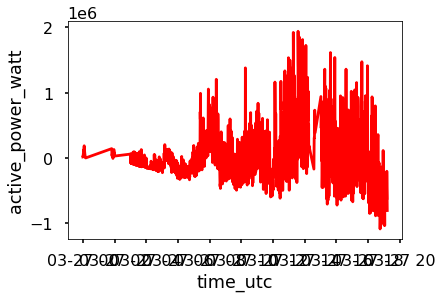

/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


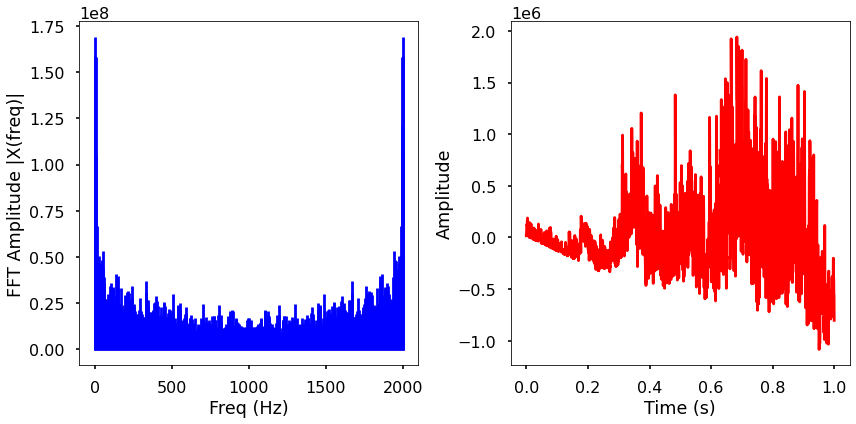

In [6]:
# Let's try to detrend the data
from scipy import signal

x = df[df['id'] == 49][:2000][['time_utc', 'active_power_watt']]
detrended = signal.detrend(x.active_power_watt)
x.active_power_watt = detrended
print(x)

sr = len(x)
print(x.head())
sns.lineplot(data = x, x = 'time_utc', y = 'active_power_watt', color = 'red')
plt.show()

X = fft(x['active_power_watt'])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), linefmt='b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(-1, 11)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

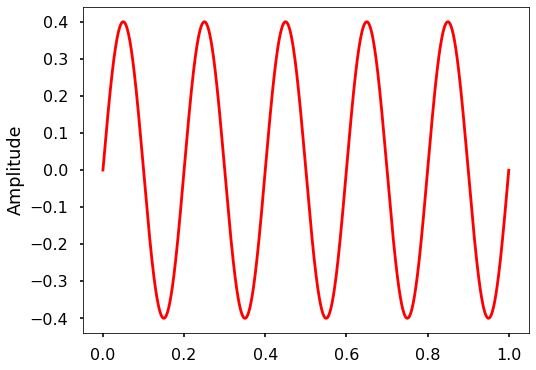

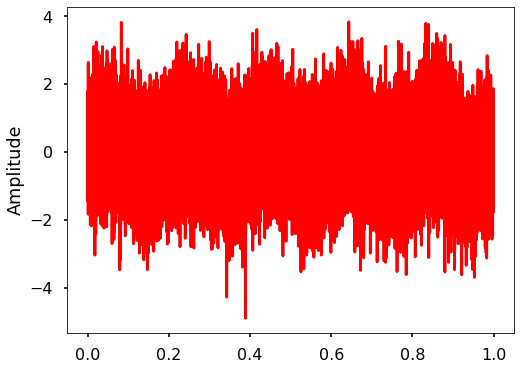

In [7]:
# Let's see if it works with other random data that's seasonal
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(20000)
# sampling rate
sr = 20000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 5
x = .4*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

x += vals

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')


plt.show()



/tmp/ipykernel_414333/2116056416.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


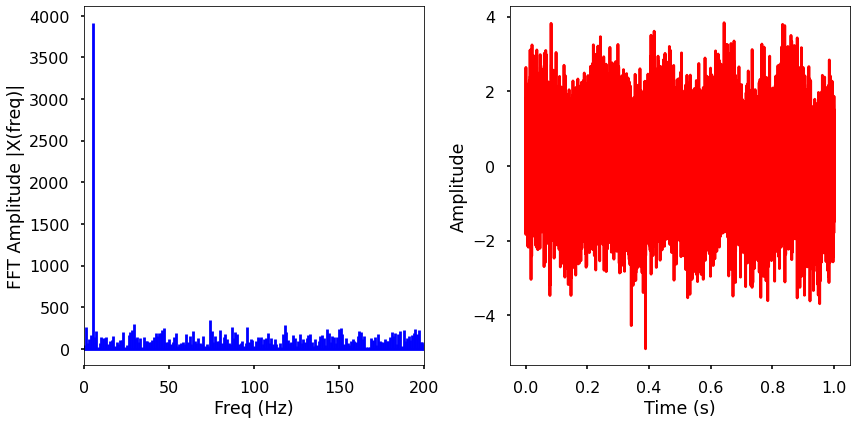

In [8]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 200)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

x_old = x#keep it for later

/tmp/ipykernel_414333/3724746677.py:22: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


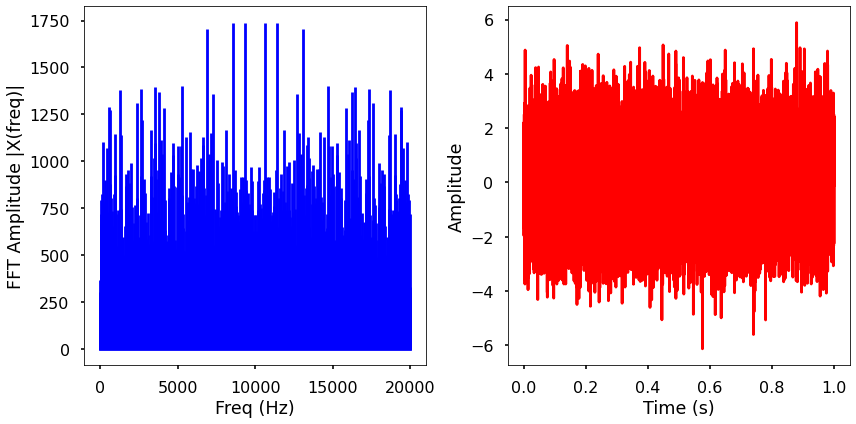

In [9]:
# Try to create more random seasonal data to make sure
base_rand = rng.standard_normal(1000)# create a base for the seasonal data
x = np.tile(base_rand, 20)# repeat the base 20 times
background_noise = np.array(rng.standard_normal(20000))
x = x + background_noise

# sampling rate
sr = 20000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 200)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [10]:
#####################################################################
################## ALL BELLOW THIS SEEMS POINTLESS ##################
#####################################################################

from statsmodels.tsa.seasonal import seasonal_decompose

data = df[df['id'] == 49][:6000][['active_power_watt']].reset_index(drop=True).reset_index()
data.head()

index  active_power_watt
0      0               1700
1      1               2700
2      2              66400
3      3             108600
4      4             104800

In [11]:
plt.rc("figure",figsize=(10,10))
#seasonal_decompose(data.active_power_watt, model='additive', period=720).plot()

In [12]:
#Trying it with the more random generated data
#seasonal_decompose(x, model='additive', period=1000).plot()

9999


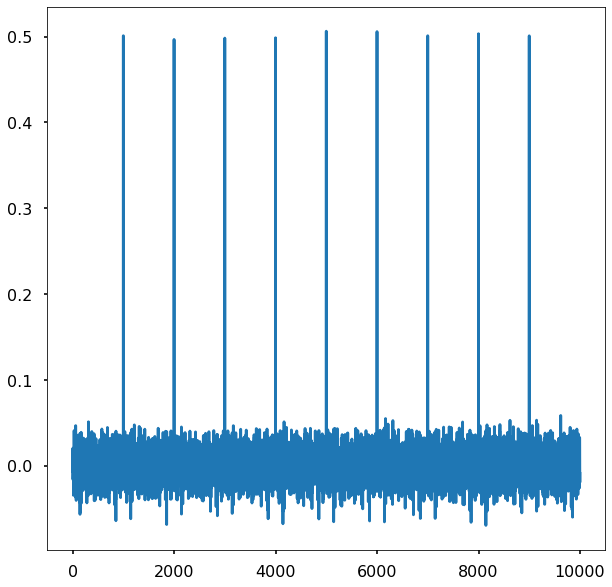

Appears to be autocorrelated with r = 0.506372667660407, lag = 5000
2999


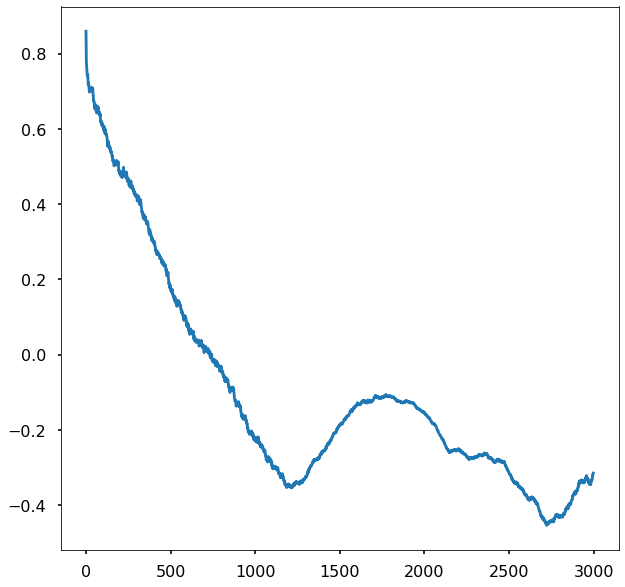

Appears to be autocorrelated with r = 0.8593993368929073, lag = 1


(0.8593993368929073, 1)

In [13]:
def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='same')
    acorr = result[n//2 + 1:] / (x.var() * np.arange(n-1, n//2, -1))
    print(len(acorr))
    plt.plot(acorr)
    plt.show()
    lag = np.abs(acorr).argmax() + 1
    r = acorr[lag-1]        
    if np.abs(r) > 0.5:
      print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
    else: 
      print('Appears to be not autocorrelated')
    return r, lag

autocorr(x)
autocorr(data.active_power_watt)

9999


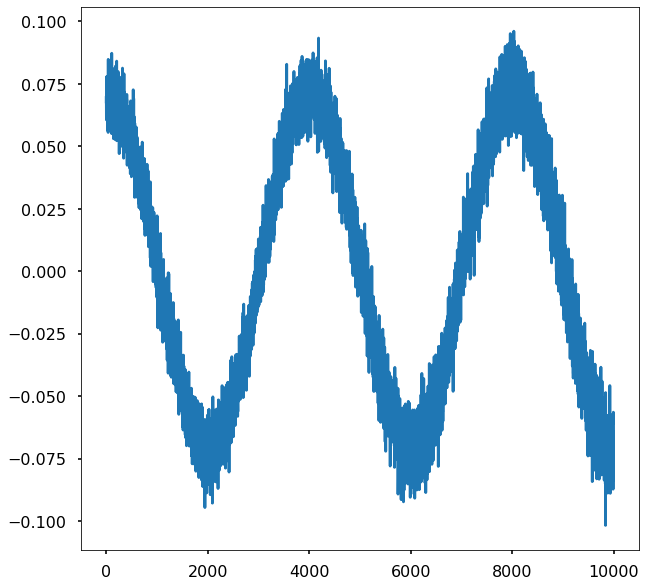

Appears to be not autocorrelated


(-0.10171970201715995, 9841)

In [14]:
autocorr(x_old)